# Improving Customers Segmentation

![Cover image](cover-image.jpg)


## Summary

- We have perfomed k-means clustering approach, and is recommending to grouped our clients into three distinct grouping as follows:

    | CLUSTER NO. | COUNTS | CHARACTERISTICS |
    |:---------|:----------| :----------|
    | 0 | 143   |"High Value Doctors with Moderate Issues". These doctors are highly ranked and satisfied with the highest average purchase, making them a valuable customers.    |
    | 1 | 112    |"Lower Ranked Doctors with Potential to Grow". These doctors has the lower rank (around `Silver` to `Gold`) with the lowest purchase.                            |
    | 2 | 182   |"Dissatisfied Doctros that Needs to be Cared". These doctors are moderately ranked with the lowest satisfaction and experience rating.  |
<br><br>

- Based on this grouping, we would propose the following course of actions, customised for each clusters:


    | CLUSTER NO. | STRATEGY |
    |:---------|:----------|
    | 0 | <ul><li>**High Value**: Focus on personalized service and loyalty programs to maintain their satisfaction and purchase levels.</li><li>**Moderate Issues**: Address any complaints efficiently to maintain their satisfaction.</li></ul>   |
    | 1 | <ul><li>**Lower Rank**: Lower rank grouping could indicate a more junior doctors - focus on providing educational resources and support to help them get more familiar with the products.</li><li>**Low Purchases**: Incentivize purchases through discounts or introductory offers to increase their purchase volume.</li></ul>     |
    | 2 | <ul><li>**Improve Satisfaction**: Implement measures to increase satisfaction, such as better customer service and follow-ups.</li><li>**Address High R Rate**: Investigate and reduce the re-work rate by providing more training or better support for using the products correctly.</li></ul>    |
 <br><br>
 
- The existing approach to grouped our clients by geography may not be a practical approach (as there are too many regions) and dosent make full use of the other attributes exists in our data. We propose if the management desires to use `Region` as the criteria for grouping, then the regions can be grouped together to make it more manageable (using k-means clustering, fitting only the `Region` attributes).

## Fitting K-Means to Create Natural Clustering Based on the Given Data
- Please refer to `pre_process.ipynb` for more information of the data and how it was pre-processed for our analysis.
- We have perform k-means clustering with 3 clusters. 
- The number of clusters chosen is based on the elbow plot - where it indicates cluster of about 2-3 clusters could be appropriate.
- From the PCA plots, we can see clear distinct grouping from using 2 and 3 clusters. We'll proceed with the 3-cluster analysis to get a better segmentation.
- Each clusters contains sizeable number of doctors (i.e. there is no cluster with very small doctors count.)

In [38]:
# THIS CODE IS IMPLEMENTED TO HAVE A BETTER READING EXPERIENCE OF THIS NOTEBOOK (BY STOPPING CODE WARNING FROM APPEARING IN THE OUTPUT)
# WHEN ANALYSING THE DATA - PLEASE DISABLE THIS TO SHOW THE WARNINGS MESSAGE.
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

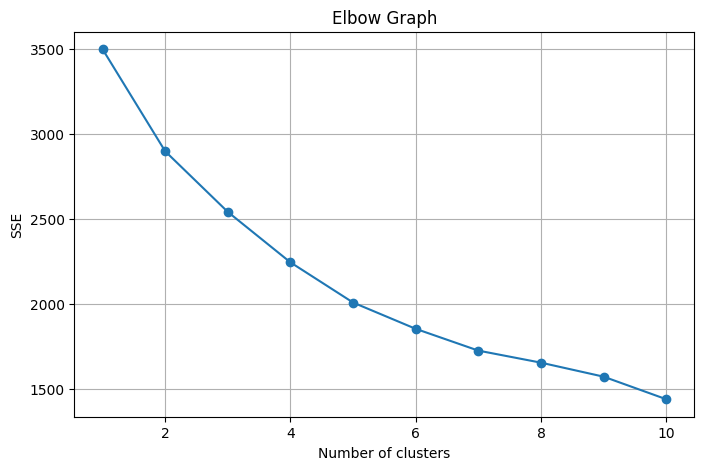

In [39]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
file_path = 'master_df.csv'
df = pd.read_csv(file_path)

# Selecting the relevant features
features = ['Region', 'Category', 'Rank', 'Incidence rate', 'R rate', 'Satisfaction_Category', 'Experience', 'Purchases_Category']
data = df[features]

# Encoding categorical variables
label_encoders = {}
for col in ['Region', 'Category', 'Satisfaction_Category', 'Purchases_Category']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Scaling the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Finding the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Graph')
plt.grid(True)
plt.show()


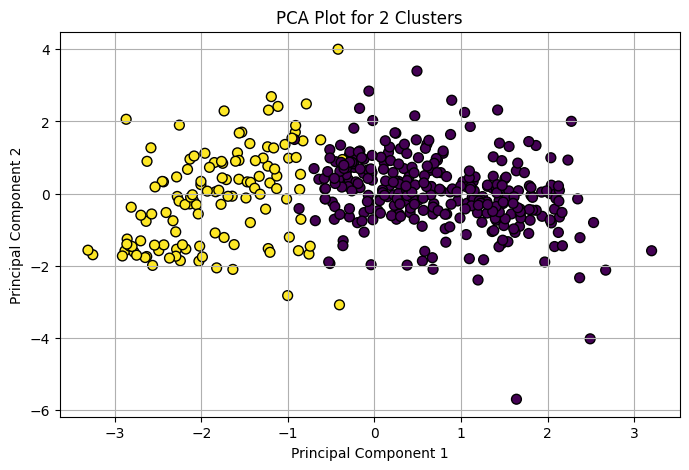

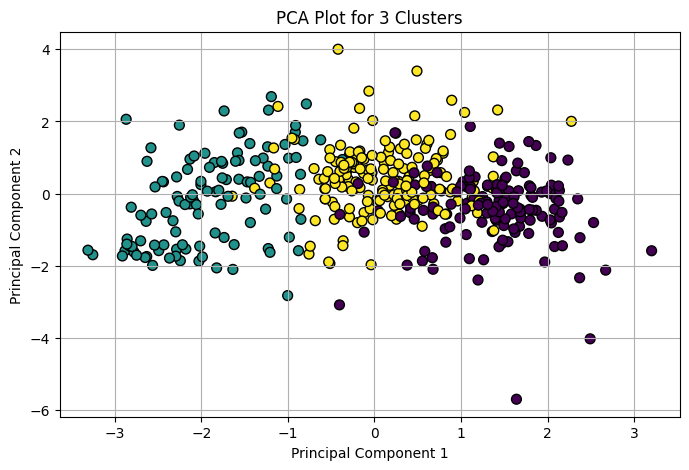

In [40]:
# Performing k-means clustering with 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
clusters_2 = kmeans_2.fit_predict(scaled_data)

# Performing k-means clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
clusters_3 = kmeans_3.fit_predict(scaled_data)

# PCA transformation
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


# PCA plot for 2 clusters
plt.figure(figsize=(8, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_2, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot for 2 Clusters')
plt.grid(True)
plt.show()

# PCA plot for 3 clusters
plt.figure(figsize=(8, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_3, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot for 3 Clusters')
plt.grid(True)
plt.show()


In [41]:
df.columns
features = ['Region', 'Category', 'Rank', 'Incidence rate', 'R rate', 'Satisfaction', 'Experience', 'Purchases']
features = features + ['Cluster']


In [42]:
# Adding the cluster labels to the original dataframe
df['Cluster'] = clusters_3

features = ['Region', 'Rank', 'Incidence rate', 'R rate', 'Satisfaction', 'Experience', 'Purchases']
# Grouping by cluster to describe the characteristics
cluster_summary = df[features + ['Cluster']].groupby('Cluster').mean()

cluster_summary['Count'] = df['Cluster'].value_counts()

print("Cluster counts:")
display(cluster_summary['Count'])
print("Average value of selected features by cluster ")
display(cluster_summary)


Cluster counts:


Cluster
0    143
1    112
2    182
Name: Count, dtype: int64

Average value of selected features by cluster 


,Region,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases,Count
Cluster,,,,,,,,
0,11.832168,8.048951,6.176713,1.094126,23.941049,0.564965,21.000000,143
1,32.375000,3.178571,4.142857,0.813929,2.375446,0.560089,4.964286,112
2,12.087912,6.060440,4.722363,1.277363,19.862967,0.493681,6.357143,182


- Summary of cluster characteristics based on average value:
    
    - `Region`
        0: Primarily from Region 11.
        1: Primarily from Region 21.
        2: Primarily from Region 19.
    - `Rank`
        0: Higher average rank (close to Platinum Plus and above).
        1: Lower average rank (around Silver to Gold).
        2: Moderate average rank (around Gold to Platinum).
    - `Incidence Rate`
        0: Moderate.
        1: Lowest among clusters.
        2: Moderate.

    - `R Rate`
        0: Moderate.
        1: Lowest among clusters.
        2: Highest among clusters.

    - `Satisfaction`
        0: Highest satisfaction among clusters.
        1: Moderate satisfaction.
        2: Lowest satisfaction.
  
    - `Experience`
        Experience: Moderate.
        Experience: Highest experience.
        Experience: Lowest experience.

    - `Purchase`
        Purchases: Highest average purchases.
        Purchases: Lowest average purchases.
        Purchases: Moderate average purchases.

In [43]:
# Creating pivot tables for each categorical column
pivot_tables = {}

categorical_columns = ['Category', 'Rank', 'Satisfaction_Category', 'Purchases_Category']


for col in categorical_columns:
    pivot_table = pd.crosstab(df['Cluster'], df[col])
    pivot_tables[col] = pivot_table

display(pivot_tables['Category'])
display(pivot_tables['Rank'])
display(pivot_tables['Satisfaction_Category'])
display(pivot_tables['Purchases_Category'])


Category,General Practitioner,Specialist
Cluster,,
0,9,134
1,49,63
2,12,170


Rank,1,2,3,4,5,6,7,8,9
Cluster,,,,,,,,,
0,0,0,0,1,7,12,33,1,89
1,2,43,20,36,7,1,2,0,1
2,1,1,2,13,63,41,34,0,27


Satisfaction_Category,Negative,Neutral,Positive
Cluster,,,
0,17,59,67
1,21,68,23
2,29,73,80


Purchases_Category,High,Low,Medium
Cluster,,,
0,131,12,0
1,3,80,29
2,0,77,105


- For ease of analysis, we have also transform the `Purchase` and `Satisfaction` into broader categorical value based on their quartile:
    - For `Purchase`: "Low", "Medium" and "High"
    - For `Satisfaction`: "Negative", "Neutral/Unrate", "Positive"

- Summary of cluster characteristics based on their categorical value:
    - `Category`:
        Cluster 0: Mostly Specialists.
        Cluster 1: All General Practitioners.
        Cluster 2: All Specialists.

    - `Rank`:
        Cluster 0: Higher ranks (Ambassadors, Titanium Plus, etc.).
        Cluster 1: Lower to mid ranks (Silver, Gold, etc.).
        Cluster 2: Mid to higher ranks (Gold to Platinum).

    - `Satisfaction Category`:
        Cluster 0: Mostly Positive, followed by Neutral and a few Negative.
        Cluster 1: Mixed, with a majority being Neutral, followed by Positive and Negative.
        Cluster 2: Mostly Neutral, followed by Positive and Negative.

    - `Purchases Category`:
        Cluster 0: Predominantly High purchasers.
        Cluster 1: Majority are Low purchasers.
        Cluster 2: Mixed, with a balance between Low and Medium purchasers.

## Clustering By `Region`
- We understood the existing practice to group our customers by their location. Although this could be a simpler approach in the past from having limited access to sophisticated machine-learning tools, the approach could be problematic:
    1. Impractical - too many region, and some region might have too little data.
    2. Too simplistic - does not consider variation and segmentation within regions.
    3. Waste of Data - does not make full use of available data that we have.

- We propose if the management desires to use `Region` as the criteria for grouping, then the regions can be grouped together to make it more manageable (using k-means clustering, fitting only the `Region` attributes).

- From the `Purchase` vs `Region` scatter plot below, we can see that we can group the regions into three clusters, so we can focus on customising strategies for only three clusters instead of each 49 region.

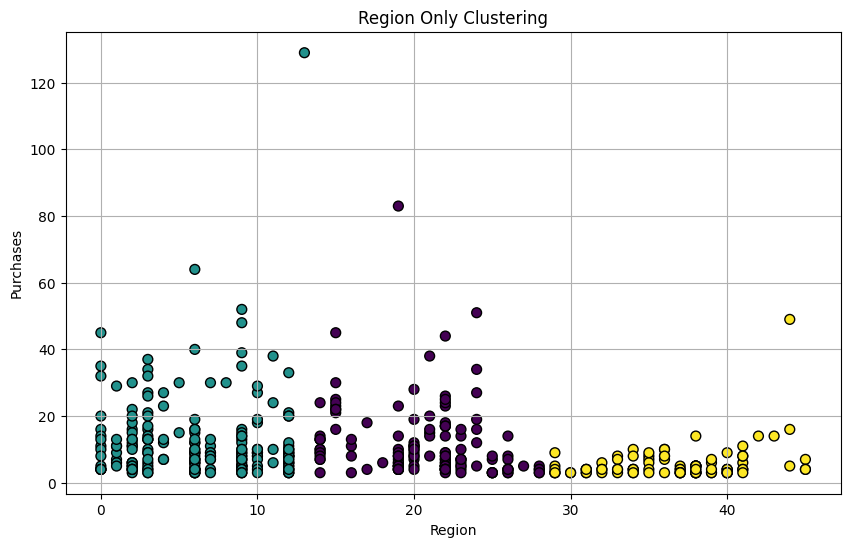

In [44]:
# Region only clustering
region_data = df[['Region']]

# Scaling the region feature
region_scaled = scaler.fit_transform(region_data)

# Performing k-means clustering with 3 clusters using only the 'Region' feature
kmeans_region = KMeans(n_clusters=3, random_state=42)
clusters_region = kmeans_region.fit_predict(region_scaled)

# Adding the region-only cluster labels to the original dataframe
df['Region_Cluster'] = clusters_region

# Creating the comparison plot for region-only clustering
plt.figure(figsize=(10, 6))
plt.scatter(df['Region'], df['Purchases'], c=df['Region_Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('Region')
plt.ylabel('Purchases')
plt.title('Region Only Clustering')
plt.grid(True)
plt.show()


- However if we compare with the clustering-model where all features are included, we can see that there exists different clusters within the same region. For example we could create two disctint grouping in `region` 0-20.

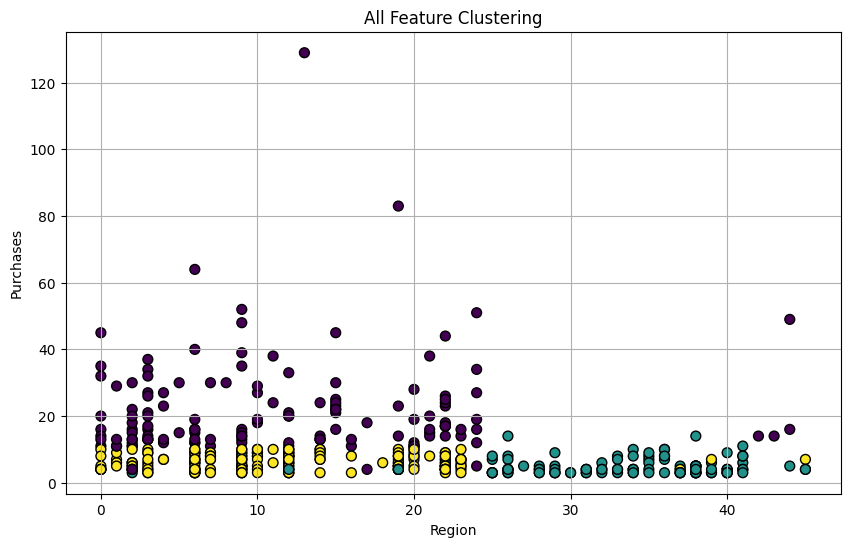

In [45]:

# Creating the comparison plot for all-feature clustering
plt.figure(figsize=(10, 6))
plt.scatter(df['Region'], df['Purchases'], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('Region')
plt.ylabel('Purchases')
plt.title('All Feature Clustering')
plt.grid(True)
plt.show()


- In summary:

    **Region Only Clustering**: The clusters are more homogeneous, primarily influenced by the regional distribution without considering other attributes.

    **All Feature Clustering**:  The clusters shows more variation and segmentation within regions, indicating the influence of factors like rank, satisfaction, and purchases.
    
    The region-only clustering can be simpler but may overlook important factors influencing purchasing behavior. Clustering with all features provides a more nuanced segmentation, helping in devising tailored strategies for different doctor profiles.

- So we propose for the management to consider changing the existing grouping practice based on our proposal grouping that considers all features in our data.